In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('citrus.csv')

In [3]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [5]:
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [27]:
df_oranges = df[df['name'] == 'orange']
df_grapefruits = df[df['name'] == 'grapefruit']

In [28]:
df_oranges.describe()

,diameter,weight,red,green,blue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.474424,152.804920,156.832800,81.988200,7.115200
std,1.260665,18.669021,9.890258,10.090789,6.493779
min,2.960000,86.760000,123.000000,49.000000,2.000000
25%,7.650000,140.147500,150.000000,75.000000,2.000000
50%,8.470000,152.665000,157.000000,82.000000,4.000000
75%,9.300000,165.430000,163.000000,89.000000,11.000000
max,12.870000,231.090000,192.000000,116.000000,38.000000


In [29]:
df_grapefruits.describe()

,diameter,weight,red,green,blue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,11.476946,197.296664,150.862800,70.033000,15.611200
std,1.221148,19.193190,10.103148,10.044924,9.271592
min,7.630000,126.790000,115.000000,31.000000,2.000000
25%,10.660000,184.350000,144.000000,63.000000,8.000000
50%,11.450000,197.430000,151.000000,70.000000,15.000000
75%,12.320000,210.165000,158.000000,77.000000,22.000000
max,16.450000,261.510000,187.000000,103.000000,56.000000


In [30]:
df.isnull().sum()

name        0
diameter    0
weight      0
red         0
green       0
blue        0
dtype: int64

In [31]:
import matplotlib.pyplot as plt

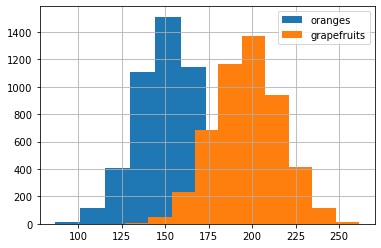

In [32]:
df_oranges['weight'].hist()
df_grapefruits['weight'].hist()
plt.legend(['oranges', 'grapefruits'])

plt.show()

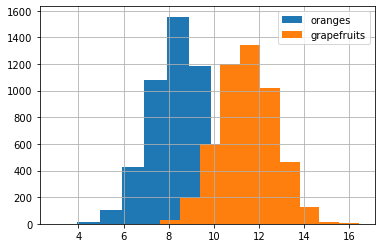

In [33]:
df_oranges['diameter'].hist()
df_grapefruits['diameter'].hist()
plt.legend(['oranges', 'grapefruits'])

plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

df['name'] = le.fit_transform(df['name'])

In [37]:
df

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,0,15.35,253.89,149,77,20
9996,0,15.41,254.67,148,68,7
9997,0,15.59,256.50,168,82,20
9998,0,15.92,260.14,142,72,11


In [40]:
# Correlation matrix
df.corr()

,name,diameter,weight,red,green,blue
name,1.000000,-0.770768,-0.761567,0.286127,0.510564,-0.468832
diameter,-0.770768,1.000000,0.999476,-0.217821,-0.396832,0.363307
weight,-0.761567,0.999476,1.000000,-0.214714,-0.392003,0.358916
red,0.286127,-0.217821,-0.214714,1.000000,0.148937,-0.135900
green,0.510564,-0.396832,-0.392003,0.148937,1.000000,-0.242495
blue,-0.468832,0.363307,0.358916,-0.135900,-0.242495,1.000000


## Correlation Analysis

#### Name and Diameter
There is a strong negative correlation (-0.770768) between the fruit's name (type) and its diameter. This implies that as the diameter increases, the likelihood of the fruit being an orange (assuming name is encoded with oranges as 0) decreases. In other words, grapefruits tend to have a larger diameter.
#### Name and Weight
There is also a strong negative correlation (-0.761567) between the fruit type and the weight. This suggests that as the weight of the fruit increases, the fruit is more likely to be a grapefruit.
#### Name and Red
A positive correlation (0.286127) between the fruit's name and the 'red' color component indicates that oranges might have a higher value of the red color component.
#### Name and Green
The 'green' color component also has a positive correlation (0.510564) with the fruit's name, indicating that oranges might have a higher green color component.
#### Name and Blue
There's a moderate negative correlation (-0.468832) between the fruit's name and the 'blue' color component, suggesting that grapefruits might have a higher blue color component.


In [42]:
# Split the data into features and target variable
X = df.drop('name', axis=1)
y = df['name']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic regression
Logistic regression is used for classification problems. It's a linear model, which means it works well when the classes can be separated by a linear boundary. It outputs probabilities that the given input point belongs to a particular class.

#### Normalize the data
Logistic Regression requires features to be on a similar scale. We'll use StandardScaler from sklearn to standardize the feature set to have a mean=0 and variance=1.

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression()
model.fit(X_train_sc, y_train)

LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test_sc)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       988
           1       0.95      0.93      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



# Decision Trees
Decision trees classify instances by sorting them down the tree from the root to some leaf node, which provides the classification of the instance. An instance is classified by starting at the root node of the tree, testing the attribute specified by this node, then moving down the tree branch corresponding to the value of the attribute.

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred = model.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       988
           1       0.95      0.95      0.95      1012

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



The decision to drop the color features ('red', 'green', 'blue') from the classification model was based on their low correlation coefficients with the target variable, 'name'. Preliminary data analysis revealed that these features had weak relationships with the fruit type, thus, including them in the model might introduce unnecessary noise. More importantly, the 'diameter' and 'weight' variables exhibited strong correlations and appeared more predictive for this task. Simplifying the model by focusing on the most informative features can improve its performance and interpretability, which was confirmed by the excellent results achieved after training the model on the remaining features.

In [66]:
df_ = df[['name', 'diameter', 'weight']]

In [67]:
df_

,name,diameter,weight
0,1,2.96,86.76
1,1,3.91,88.05
2,1,4.42,95.17
3,1,4.47,95.60
4,1,4.48,95.76
...,...,...,...
9995,0,15.35,253.89
9996,0,15.41,254.67
9997,0,15.59,256.50
9998,0,15.92,260.14


In [70]:
# Split the data into features and target variable
X = df_.drop('name', axis=1)
y = df_['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
y_pred = model.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       988
           1       1.00      0.99      1.00      1012

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



it seems that the 'diameter' and 'weight' features were highly informative and the decision to drop the color features was a good one given your current task and dataset.